In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization
# %matplotlib inline
import os

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [ ]:
import tensorflow as tf

In [3]:
def get_key(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key
    return None

In [4]:
df = pd.DataFrame()
euclidean_dist_final = []
euclidean_dist_npy_s = []
alphabet = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M',
                     'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'])
alpha_dict = {ord(char): char for char in alphabet}
#
{65: 'A', 66: 'B', 67: 'C', 68: 'D', 69: 'E', 70: 'F', 71: 'G', 72: 'H', 73: 'I', 75: 'K', 76: 'L', 77: 'M', 78: 'N', 79: 'O', 80: 'P', 81: 'Q', 82: 'R', 83: 'S', 84: 'T', 85: 'U', 86: 'V', 87: 'W', 88: 'X', 89: 'Y'}
#
for dirname, _, filenames in os.walk('/HDD-1T/ASL_Data_Static'):
    if any(dirname.endswith(letter) for letter in alphabet):
        label = get_key(alpha_dict, dirname[-1])
        for filename in filenames:
            if filename.startswith('euclidean_distances'):
                euclidean_dist_npy = np.load(os.path.join(dirname,filename))
                euclidean_dist_with_label = np.insert(euclidean_dist_npy, 0, label)
                euclidean_dist_final = np.append(euclidean_dist_final, euclidean_dist_with_label)
                euclidean_dist_npy_s = np.append(euclidean_dist_npy_s, euclidean_dist_npy)
                row_df = pd.DataFrame([euclidean_dist_with_label])
                df = pd.concat([df, row_df], ignore_index=True)
euclidean_dist_final = np.array(euclidean_dist_final)
euclidean_dist_npy_s = np.array(euclidean_dist_npy_s)
np.savetxt('/HDD-1T/ASL_Data_Static/euclidean_distances_with_labels.txt', euclidean_dist_final, fmt='%s', delimiter=',')

In [5]:
df_test = pd.DataFrame()
euclidean_dist_final_test = []
euclidean_dist_npy_s_test = []
alphabet = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M',
                     'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
alpha_dict = {ord(char): char for char in alphabet}
#
{65: 'A', 66: 'B', 67: 'C', 68: 'D', 69: 'E', 70: 'F', 71: 'G', 72: 'H', 73: 'I', 75: 'K', 76: 'L', 77: 'M', 78: 'N', 79: 'O', 80: 'P', 81: 'Q', 82: 'R', 83: 'S', 84: 'T', 85: 'U', 86: 'V', 87: 'W', 88: 'X', 89: 'Y', 90: 'Z'}
#
for dirname, _, filenames in os.walk('/HDD-1T/ASL_Data_Static_Test'):
    if any(dirname.endswith(letter) for letter in alphabet):
        label = get_key(alpha_dict, dirname[-1])
        for filename in filenames:
            if filename.startswith('euclidean_distances'):
                euclidean_dist_npy = np.load(os.path.join(dirname,filename))
                euclidean_dist_with_label = np.insert(euclidean_dist_npy, 0, label)
                euclidean_dist_final = np.append(euclidean_dist_final_test, euclidean_dist_with_label)
                euclidean_dist_npy_s_test = np.append(euclidean_dist_npy_s_test, euclidean_dist_npy)
                row_df_test = pd.DataFrame([euclidean_dist_with_label])
                df_test = pd.concat([df_test, row_df_test], ignore_index=True)
euclidean_dist_final_test = np.array(euclidean_dist_final_test)
euclidean_dist_npy_s_test = np.array(euclidean_dist_npy_s_test)
np.savetxt('/HDD-1T/ASL_Data_Static_Test/euclidean_distances_with_labels_test.txt', euclidean_dist_final_test, fmt='%s', delimiter=',')

In [6]:
alpha_dict[70]

'F'

In [7]:
ascii_values = [key for key in sorted(alpha_dict.keys())]

In [8]:
ascii_values

[65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90]

In [9]:
df.shape

(758, 211)

In [10]:
df_test.shape

(320, 211)

In [11]:
df.head()

0         1         2         3         4         5         6         7    \
0  75.0  0.047563  0.092833  0.124589  0.144396  0.130558  0.188984  0.224570   
1  75.0  0.109321  0.231019  0.329946  0.391343  0.306080  0.455973  0.545007   
2  75.0  0.067056  0.145013  0.217263  0.273793  0.202458  0.305530  0.369237   
3  75.0  0.072473  0.165957  0.247223  0.286281  0.224362  0.339365  0.403098   
4  75.0  0.078064  0.161059  0.223785  0.266914  0.201037  0.287296  0.338388   

        8         9    ...       201       202       203       204       205  \
0  0.254015  0.124881  ...  0.043223  0.041432  0.020248  0.020029  0.030980   
1  0.624600  0.292854  ...  0.132687  0.134581  0.062209  0.040173  0.074314   
2  0.421322  0.200483  ...  0.082872  0.101596  0.044907  0.035752  0.057698   
3  0.459642  0.214205  ...  0.100986  0.100431  0.044103  0.031268  0.058083   
4  0.383992  0.192814  ...  0.074335  0.078150  0.036677  0.029374  0.049323   

        206       207       208       209       210  
0  0.026725  0.033887  0.023414  0.046218  0.023471  
1  0.082718  0.115038  0.075812  0.134861  0.060868  
2  0.050831  0.079068  0.063152  0.111171  0.049062  
3  0.066809  0.090857  0.061174  0.103340  0.043281  
4  0.049079  0.066026  0.047153  0.081722  0.035448  

[5 rows x 211 columns]

In [12]:
df_test.head()

0         1         2         3         4         5         6         7    \
0  75.0  0.044213  0.085864  0.116513  0.136854  0.105455  0.146540  0.170977   
1  75.0  0.084866  0.177747  0.264103  0.338931  0.234674  0.349661  0.420230   
2  75.0  0.068872  0.141495  0.199784  0.239147  0.175872  0.247385  0.290676   
3  75.0  0.075277  0.156632  0.223694  0.276877  0.223296  0.324761  0.384304   
4  75.0  0.103478  0.255290  0.370759  0.455767  0.319121  0.465341  0.554153   

        8         9    ...       201       202       203       204       205  \
0  0.191890  0.095652  ...  0.019886  0.026865  0.015132  0.017214  0.015762   
1  0.479087  0.227768  ...  0.110952  0.129150  0.065634  0.035398  0.063092   
2  0.330294  0.165850  ...  0.044992  0.060852  0.028338  0.025853  0.031189   
3  0.435702  0.215684  ...  0.071064  0.080912  0.042402  0.020579  0.042464   
4  0.627054  0.329623  ...  0.183849  0.143903  0.051804  0.071435  0.098933   

        206       207       208       209       210  
0  0.016102  0.025531  0.017603  0.032082  0.014728  
1  0.059811  0.088632  0.066463  0.117980  0.052753  
2  0.029804  0.052595  0.039051  0.070301  0.031532  
3  0.035833  0.055488  0.039887  0.074887  0.035278  
4  0.147734  0.193832  0.110503  0.181528  0.073639  

[5 rows x 211 columns]

In [13]:
df = df.rename(columns={0: 'Label'})
df_test = df_test.rename(columns={0: 'Label'})

In [14]:
df.head()

Label         1         2         3         4         5         6  \
0   75.0  0.047563  0.092833  0.124589  0.144396  0.130558  0.188984   
1   75.0  0.109321  0.231019  0.329946  0.391343  0.306080  0.455973   
2   75.0  0.067056  0.145013  0.217263  0.273793  0.202458  0.305530   
3   75.0  0.072473  0.165957  0.247223  0.286281  0.224362  0.339365   
4   75.0  0.078064  0.161059  0.223785  0.266914  0.201037  0.287296   

          7         8         9  ...       201       202       203       204  \
0  0.224570  0.254015  0.124881  ...  0.043223  0.041432  0.020248  0.020029   
1  0.545007  0.624600  0.292854  ...  0.132687  0.134581  0.062209  0.040173   
2  0.369237  0.421322  0.200483  ...  0.082872  0.101596  0.044907  0.035752   
3  0.403098  0.459642  0.214205  ...  0.100986  0.100431  0.044103  0.031268   
4  0.338388  0.383992  0.192814  ...  0.074335  0.078150  0.036677  0.029374   

        205       206       207       208       209       210  
0  0.030980  0.026725  0.033887  0.023414  0.046218  0.023471  
1  0.074314  0.082718  0.115038  0.075812  0.134861  0.060868  
2  0.057698  0.050831  0.079068  0.063152  0.111171  0.049062  
3  0.058083  0.066809  0.090857  0.061174  0.103340  0.043281  
4  0.049323  0.049079  0.066026  0.047153  0.081722  0.035448  

[5 rows x 211 columns]

In [15]:
df_test.head()

Label         1         2         3         4         5         6  \
0   75.0  0.044213  0.085864  0.116513  0.136854  0.105455  0.146540   
1   75.0  0.084866  0.177747  0.264103  0.338931  0.234674  0.349661   
2   75.0  0.068872  0.141495  0.199784  0.239147  0.175872  0.247385   
3   75.0  0.075277  0.156632  0.223694  0.276877  0.223296  0.324761   
4   75.0  0.103478  0.255290  0.370759  0.455767  0.319121  0.465341   

          7         8         9  ...       201       202       203       204  \
0  0.170977  0.191890  0.095652  ...  0.019886  0.026865  0.015132  0.017214   
1  0.420230  0.479087  0.227768  ...  0.110952  0.129150  0.065634  0.035398   
2  0.290676  0.330294  0.165850  ...  0.044992  0.060852  0.028338  0.025853   
3  0.384304  0.435702  0.215684  ...  0.071064  0.080912  0.042402  0.020579   
4  0.554153  0.627054  0.329623  ...  0.183849  0.143903  0.051804  0.071435   

        205       206       207       208       209       210  
0  0.015762  0.016102  0.025531  0.017603  0.032082  0.014728  
1  0.063092  0.059811  0.088632  0.066463  0.117980  0.052753  
2  0.031189  0.029804  0.052595  0.039051  0.070301  0.031532  
3  0.042464  0.035833  0.055488  0.039887  0.074887  0.035278  
4  0.098933  0.147734  0.193832  0.110503  0.181528  0.073639  

[5 rows x 211 columns]

In [16]:
df.columns

Index(['Label',       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           201,     202,     203,     204,     205,     206,     207,     208,
           209,     210],
      dtype='object', length=211)

In [17]:
df_test.columns

Index(['Label',       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           201,     202,     203,     204,     205,     206,     207,     208,
           209,     210],
      dtype='object', length=211)

In [18]:
df.info

<bound method DataFrame.info of      Label         1         2         3         4         5         6  \
0     75.0  0.047563  0.092833  0.124589  0.144396  0.130558  0.188984   
1     75.0  0.109321  0.231019  0.329946  0.391343  0.306080  0.455973   
2     75.0  0.067056  0.145013  0.217263  0.273793  0.202458  0.305530   
3     75.0  0.072473  0.165957  0.247223  0.286281  0.224362  0.339365   
4     75.0  0.078064  0.161059  0.223785  0.266914  0.201037  0.287296   
..     ...       ...       ...       ...       ...       ...       ...   
753   89.0  0.069625  0.132245  0.188327  0.232163  0.155014  0.218485   
754   89.0  0.120522  0.211345  0.290858  0.363453  0.265363  0.347354   
755   89.0  0.089944  0.176222  0.247599  0.292955  0.201273  0.250678   
756   89.0  0.069125  0.149192  0.212299  0.255697  0.185709  0.253054   
757   89.0  0.057555  0.126439  0.183122  0.219034  0.172870  0.215173   

            7         8         9  ...       201       202       203  \
0    0.

In [19]:
df_test.info

<bound method DataFrame.info of      Label         1         2         3         4         5         6  \
0     75.0  0.044213  0.085864  0.116513  0.136854  0.105455  0.146540   
1     75.0  0.084866  0.177747  0.264103  0.338931  0.234674  0.349661   
2     75.0  0.068872  0.141495  0.199784  0.239147  0.175872  0.247385   
3     75.0  0.075277  0.156632  0.223694  0.276877  0.223296  0.324761   
4     75.0  0.103478  0.255290  0.370759  0.455767  0.319121  0.465341   
..     ...       ...       ...       ...       ...       ...       ...   
315   89.0  0.094905  0.181865  0.255707  0.314557  0.243489  0.264223   
316   89.0  0.058132  0.125788  0.178666  0.215349  0.162077  0.218469   
317   89.0  0.053117  0.116055  0.168965  0.202765  0.154284  0.198270   
318   89.0  0.055984  0.117860  0.166800  0.201711  0.157017  0.207005   
319   89.0  0.053344  0.108367  0.155190  0.191343  0.143095  0.181678   

            7         8         9  ...       201       202       203  \
0    0.

In [20]:
df.dtypes

Label    float64
1        float64
2        float64
3        float64
4        float64
          ...   
206      float64
207      float64
208      float64
209      float64
210      float64
Length: 211, dtype: object

In [21]:
df_test.dtypes

Label    float64
1        float64
2        float64
3        float64
4        float64
          ...   
206      float64
207      float64
208      float64
209      float64
210      float64
Length: 211, dtype: object

In [22]:
df.isnull().sum()

Label    0
1        0
2        0
3        0
4        0
        ..
206      0
207      0
208      0
209      0
210      0
Length: 211, dtype: int64

In [23]:
df.isna().sum()

Label    0
1        0
2        0
3        0
4        0
        ..
206      0
207      0
208      0
209      0
210      0
Length: 211, dtype: int64

In [24]:
print(round(df.describe(),2))

        Label       1       2       3       4       5       6       7       8  \
count  758.00  758.00  758.00  758.00  758.00  758.00  758.00  758.00  758.00   
mean    77.20    0.09    0.17    0.24    0.28    0.24    0.33    0.35    0.35   
std      7.33    0.03    0.05    0.08    0.09    0.07    0.10    0.11    0.14   
min     65.00    0.02    0.04    0.05    0.06    0.08    0.11    0.09    0.09   
25%     71.00    0.07    0.13    0.18    0.22    0.20    0.26    0.27    0.25   
50%     78.00    0.08    0.17    0.23    0.27    0.24    0.33    0.34    0.35   
75%     83.75    0.10    0.20    0.28    0.33    0.29    0.40    0.43    0.45   
max     89.00    0.22    0.46    0.65    0.79    0.56    0.72    0.70    0.81   

            9  ...     201     202     203     204     205     206     207  \
count  758.00  ...  758.00  758.00  758.00  758.00  758.00  758.00  758.00   
mean     0.23  ...    0.12    0.11    0.08    0.07    0.07    0.09    0.10   
std      0.07  ...    0.07    0.06  

In [25]:
print(round(df_test.describe(),2))

        Label       1       2       3       4       5       6       7       8  \
count  320.00  320.00  320.00  320.00  320.00  320.00  320.00  320.00  320.00   
mean    77.39    0.08    0.15    0.21    0.24    0.22    0.30    0.31    0.32   
std      7.37    0.03    0.06    0.08    0.10    0.08    0.11    0.13    0.16   
min     65.00    0.02    0.04    0.05    0.06    0.07    0.04    0.06    0.07   
25%     71.00    0.05    0.11    0.15    0.17    0.15    0.20    0.20    0.20   
50%     78.00    0.07    0.14    0.19    0.22    0.21    0.28    0.30    0.29   
75%     84.00    0.09    0.19    0.26    0.29    0.27    0.37    0.40    0.42   
max     89.00    0.20    0.38    0.52    0.65    0.52    0.75    0.77    0.83   

            9  ...     201     202     203     204     205     206     207  \
count  320.00  ...  320.00  320.00  320.00  320.00  320.00  320.00  320.00   
mean     0.21  ...    0.10    0.09    0.07    0.06    0.07    0.07    0.08   
std      0.08  ...    0.07    0.06  

In [26]:
df_without_label = df.copy()
df_without_label.drop(columns = ['Label'], axis=1, inplace=True)

In [27]:
df_test_without_label = df_test.copy()
df_test_without_label.drop(columns = ['Label'], axis=1, inplace=True)

In [28]:
df_without_label.head()

1         2         3         4         5         6         7    \
0  0.047563  0.092833  0.124589  0.144396  0.130558  0.188984  0.224570   
1  0.109321  0.231019  0.329946  0.391343  0.306080  0.455973  0.545007   
2  0.067056  0.145013  0.217263  0.273793  0.202458  0.305530  0.369237   
3  0.072473  0.165957  0.247223  0.286281  0.224362  0.339365  0.403098   
4  0.078064  0.161059  0.223785  0.266914  0.201037  0.287296  0.338388   

        8         9         10   ...       201       202       203       204  \
0  0.254015  0.124881  0.189128  ...  0.043223  0.041432  0.020248  0.020029   
1  0.624600  0.292854  0.450237  ...  0.132687  0.134581  0.062209  0.040173   
2  0.421322  0.200483  0.323124  ...  0.082872  0.101596  0.044907  0.035752   
3  0.459642  0.214205  0.334744  ...  0.100986  0.100431  0.044103  0.031268   
4  0.383992  0.192814  0.285167  ...  0.074335  0.078150  0.036677  0.029374   

        205       206       207       208       209       210  
0  0.030980  0.026725  0.033887  0.023414  0.046218  0.023471  
1  0.074314  0.082718  0.115038  0.075812  0.134861  0.060868  
2  0.057698  0.050831  0.079068  0.063152  0.111171  0.049062  
3  0.058083  0.066809  0.090857  0.061174  0.103340  0.043281  
4  0.049323  0.049079  0.066026  0.047153  0.081722  0.035448  

[5 rows x 210 columns]

In [29]:
df_test_without_label.head()

1         2         3         4         5         6         7    \
0  0.044213  0.085864  0.116513  0.136854  0.105455  0.146540  0.170977   
1  0.084866  0.177747  0.264103  0.338931  0.234674  0.349661  0.420230   
2  0.068872  0.141495  0.199784  0.239147  0.175872  0.247385  0.290676   
3  0.075277  0.156632  0.223694  0.276877  0.223296  0.324761  0.384304   
4  0.103478  0.255290  0.370759  0.455767  0.319121  0.465341  0.554153   

        8         9         10   ...       201       202       203       204  \
0  0.191890  0.095652  0.138175  ...  0.019886  0.026865  0.015132  0.017214   
1  0.479087  0.227768  0.347980  ...  0.110952  0.129150  0.065634  0.035398   
2  0.330294  0.165850  0.244186  ...  0.044992  0.060852  0.028338  0.025853   
3  0.435702  0.215684  0.327961  ...  0.071064  0.080912  0.042402  0.020579   
4  0.627054  0.329623  0.501996  ...  0.183849  0.143903  0.051804  0.071435   

        205       206       207       208       209       210  
0  0.015762  0.016102  0.025531  0.017603  0.032082  0.014728  
1  0.063092  0.059811  0.088632  0.066463  0.117980  0.052753  
2  0.031189  0.029804  0.052595  0.039051  0.070301  0.031532  
3  0.042464  0.035833  0.055488  0.039887  0.074887  0.035278  
4  0.098933  0.147734  0.193832  0.110503  0.181528  0.073639  

[5 rows x 210 columns]

In [30]:
df_test_without_label.shape

(320, 210)

In [31]:
df_without_label.shape

(758, 210)

In [32]:
# Calculate the number of subplots needed based on the number of columns in the DataFrame
num_cols = df_without_label.shape[1]
num_rows = (num_cols + 1) // 2  # Calculate number of rows needed for the layout
plt.rcParams['figure.figsize'] = (30, 5 * num_rows)
df_without_label.plot(kind='hist', bins=10, subplots=True, layout=(num_rows, 2), sharex=False, sharey=False)
plt.show()

In [33]:
# Calculate the number of subplots needed based on the number of columns in the DataFrame
num_cols = df_test_without_label.shape[1]
num_rows = (num_cols + 1) // 2  # Calculate number of rows needed for the layout
plt.rcParams['figure.figsize'] = (30, 5 * num_rows)
df_test_without_label.plot(kind='hist', bins=10, subplots=True, layout=(num_rows, 2), sharex=False, sharey=False)
plt.show()

In [34]:
X_train = df_without_label.values
y_train = df['Label']
y_train = y_train.values

In [35]:
X_test = df_test_without_label.values
y_test = df_test['Label']
y_test = y_test.values

In [36]:
X_train

array([[0.04756339, 0.09283292, 0.12458852, ..., 0.02341395, 0.04621805,
        0.02347053],
       [0.10932133, 0.23101856, 0.32994637, ..., 0.07581151, 0.13486131,
        0.06086782],
       [0.06705604, 0.14501305, 0.21726284, ..., 0.06315239, 0.11117126,
        0.04906166],
       ...,
       [0.08994379, 0.17622192, 0.24759852, ..., 0.03988442, 0.07968943,
        0.04001471],
       [0.06912477, 0.14919169, 0.21229926, ..., 0.04408321, 0.08865041,
        0.0448445 ],
       [0.05755517, 0.12643947, 0.18312221, ..., 0.02729784, 0.05334888,
        0.0262472 ]])

In [37]:
X_test

array([[0.04421287, 0.08586431, 0.11651292, ..., 0.01760309, 0.03208215,
        0.01472819],
       [0.08486586, 0.17774748, 0.26410349, ..., 0.06646251, 0.11798003,
        0.05275324],
       [0.06887244, 0.1414946 , 0.19978364, ..., 0.03905099, 0.07030051,
        0.03153156],
       ...,
       [0.05311743, 0.11605459, 0.16896511, ..., 0.02419136, 0.0467221 ,
        0.02285351],
       [0.05598377, 0.11786042, 0.16679975, ..., 0.02115407, 0.04180888,
        0.02123541],
       [0.05334398, 0.10836676, 0.15519012, ..., 0.0252119 , 0.0486311 ,
        0.02364795]])

In [38]:
y_train

array([75., 75., 75., 75., 75., 75., 75., 75., 75., 75., 75., 75., 75.,
       75., 75., 75., 75., 75., 75., 75., 75., 75., 75., 75., 75., 75.,
       75., 75., 75., 75., 75., 79., 79., 79., 79., 79., 79., 79., 79.,
       79., 79., 79., 79., 79., 79., 79., 79., 79., 79., 79., 79., 79.,
       79., 79., 79., 79., 79., 79., 79., 79., 79., 79., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 80.,
       80., 80., 80., 80., 80., 80., 80., 80., 80., 80., 80., 80., 80.,
       80., 80., 80., 80., 80., 80., 80., 80., 80., 80., 80., 80., 80.,
       80., 80., 80., 80., 80., 80., 80., 67., 67., 67., 67., 67., 67.,
       67., 67., 67., 67., 67., 67., 67., 67., 67., 67., 67., 67., 67.,
       67., 67., 67., 67., 67., 67., 67., 67., 67., 67., 67., 67., 67.,
       67., 83., 83., 83., 83., 83., 83., 83., 83., 83., 83., 83., 83.,
       83., 83., 83., 83., 83., 83., 83., 83., 83., 83., 83., 83

In [39]:
y_test

array([75., 75., 75., 75., 75., 75., 75., 75., 75., 75., 75., 75., 75.,
       79., 79., 79., 79., 79., 79., 79., 79., 79., 79., 79., 79., 79.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 80.,
       80., 80., 80., 80., 80., 80., 80., 80., 80., 80., 80., 80., 80.,
       67., 67., 67., 67., 67., 67., 67., 67., 67., 67., 67., 67., 67.,
       67., 83., 83., 83., 83., 83., 83., 83., 83., 83., 83., 83., 83.,
       81., 81., 81., 81., 81., 81., 81., 81., 81., 81., 81., 81., 81.,
       81., 81., 65., 65., 65., 65., 65., 65., 65., 65., 65., 65., 65.,
       65., 65., 68., 68., 68., 68., 68., 68., 68., 68., 68., 68., 68.,
       68., 68., 68., 87., 87., 87., 87., 87., 87., 87., 87., 87., 87.,
       87., 87., 71., 71., 71., 71., 71., 71., 71., 71., 71., 71., 71.,
       71., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73.,
       73., 88., 88., 88., 88., 88., 88., 88., 88., 88., 88., 88., 88.,
       88., 88., 88., 88., 72., 72., 72., 72., 72., 72., 72., 72

In [40]:
y_test[120]

87.0

In [50]:
def most_frequent_value(arr):
    # Convert the numpy array to a list and count the frequency of each element
    counter = Counter(arr)
    # Find the most common element and its frequency
    max_freq_value, max_freq = counter.most_common(1)[0]
    return max_freq_value, max_freq

In [42]:
df.iloc[[ 11, 0, 747, 618, 753]]['Label'].values

array([75., 75., 89., 77., 89.])

In [52]:
from collections import Counter
nearest_neighbor_ids_test = []
predicted_labels = []
y_pred = []
for x_test_index, x_test in enumerate(X_test):
    distances_test = np.linalg.norm(X_train - x_test, axis=1)
    k = 3
    nearest_neighbor_ids_test = distances_test.argsort()[:k]
    # print(nearest_neighbor_ids_test)
    predicted_labels = df.iloc[nearest_neighbor_ids_test]['Label'].values
    # print(predicted_labels)
    predicted_value, freq_predicted_value = most_frequent_value(predicted_labels) # value of the predicted label
    real_value = df_test.iloc[x_test_index]['Label']
    predicted_label = alpha_dict[predicted_value.astype(int)]
    y_pred = np.append(y_pred, predicted_value)
    real_label = alpha_dict[real_value.astype(int)]
    print(f"The predicted value {predicted_value} corresponding to {predicted_label}.")
    print(f"The actual value {real_value} corresponding to {real_label}.")
    print("----------------------------------------------------------------------")

The predicted value 75.0 corresponding to K.
The actual value 75.0 corresponding to K.
----------------------------------------------------------------------
The predicted value 75.0 corresponding to K.
The actual value 75.0 corresponding to K.
----------------------------------------------------------------------
The predicted value 75.0 corresponding to K.
The actual value 75.0 corresponding to K.
----------------------------------------------------------------------
The predicted value 75.0 corresponding to K.
The actual value 75.0 corresponding to K.
----------------------------------------------------------------------
The predicted value 75.0 corresponding to K.
The actual value 75.0 corresponding to K.
----------------------------------------------------------------------
The predicted value 75.0 corresponding to K.
The actual value 75.0 corresponding to K.
----------------------------------------------------------------------
The predicted value 75.0 corresponding to K.
The act

In [53]:
y_pred

array([75., 75., 75., 75., 75., 75., 75., 75., 75., 75., 75., 75., 75.,
       79., 79., 79., 79., 69., 79., 79., 79., 69., 79., 67., 69., 79.,
       70., 79., 70., 70., 70., 70., 79., 70., 79., 70., 70., 79., 80.,
       80., 81., 80., 80., 75., 80., 80., 80., 80., 80., 72., 80., 80.,
       67., 67., 67., 83., 67., 67., 66., 67., 67., 67., 79., 67., 67.,
       79., 83., 83., 83., 84., 83., 84., 84., 83., 83., 83., 84., 83.,
       81., 81., 81., 80., 81., 78., 78., 81., 81., 71., 81., 81., 81.,
       81., 81., 84., 84., 65., 65., 84., 84., 65., 65., 65., 79., 65.,
       65., 65., 68., 88., 68., 68., 83., 68., 68., 68., 68., 68., 68.,
       68., 68., 88., 87., 87., 87., 87., 87., 87., 87., 87., 87., 87.,
       87., 87., 71., 81., 71., 71., 71., 71., 71., 71., 71., 71., 71.,
       71., 73., 83., 73., 73., 73., 89., 73., 83., 73., 73., 89., 69.,
       73., 88., 88., 88., 88., 88., 83., 88., 88., 88., 88., 83., 88.,
       88., 83., 69., 71., 72., 72., 72., 72., 72., 72., 72., 72

In [54]:
y_test

array([75., 75., 75., 75., 75., 75., 75., 75., 75., 75., 75., 75., 75.,
       79., 79., 79., 79., 79., 79., 79., 79., 79., 79., 79., 79., 79.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 80.,
       80., 80., 80., 80., 80., 80., 80., 80., 80., 80., 80., 80., 80.,
       67., 67., 67., 67., 67., 67., 67., 67., 67., 67., 67., 67., 67.,
       67., 83., 83., 83., 83., 83., 83., 83., 83., 83., 83., 83., 83.,
       81., 81., 81., 81., 81., 81., 81., 81., 81., 81., 81., 81., 81.,
       81., 81., 65., 65., 65., 65., 65., 65., 65., 65., 65., 65., 65.,
       65., 65., 68., 68., 68., 68., 68., 68., 68., 68., 68., 68., 68.,
       68., 68., 68., 87., 87., 87., 87., 87., 87., 87., 87., 87., 87.,
       87., 87., 71., 71., 71., 71., 71., 71., 71., 71., 71., 71., 71.,
       71., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73.,
       73., 88., 88., 88., 88., 88., 88., 88., 88., 88., 88., 88., 88.,
       88., 88., 88., 88., 72., 72., 72., 72., 72., 72., 72., 72

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
conf_mat = confusion_matrix(y_test, y_pred)

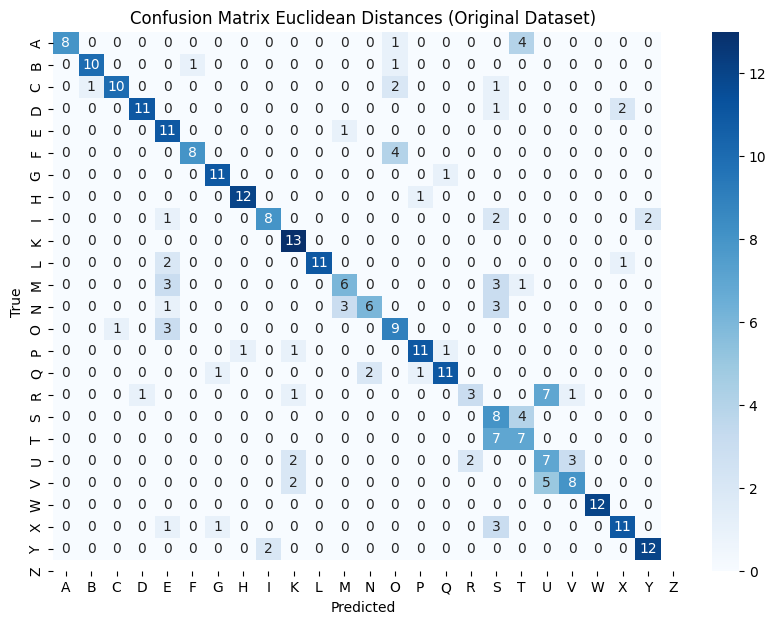

In [65]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels = alpha_dict.values(), yticklabels = alpha_dict.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Euclidean Distances (Original Dataset)')
plt.savefig('Conf_Mat_Euclid_Dist_original')
plt.show()

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        65.0       1.00      0.62      0.76        13
        66.0       0.91      0.83      0.87        12
        67.0       0.91      0.71      0.80        14
        68.0       0.92      0.79      0.85        14
        69.0       0.50      0.92      0.65        12
        70.0       0.89      0.67      0.76        12
        71.0       0.85      0.92      0.88        12
        72.0       0.92      0.92      0.92        13
        73.0       0.80      0.62      0.70        13
        75.0       0.68      1.00      0.81        13
        76.0       1.00      0.79      0.88        14
        77.0       0.60      0.46      0.52        13
        78.0       0.75      0.46      0.57        13
        79.0       0.53      0.69      0.60        13
        80.0       0.85      0.79      0.81        14
        81.0       0.85      0.73      0.79        15
        82.0       0.60      0.23      0.33        13
        83.0       0.29    

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [59]:
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')

In [60]:
macro_precision

0.7479190530902992

In [61]:
macro_recall

0.7034474206349207

In [62]:
accuracy_score(y_test, y_pred)

0.7

In [63]:
precision_total = 0
recall_total = 0
for i in range(conf_mat.shape[0]):
    TP = conf_mat[i, i]
    FP = conf_mat[:, i].sum() - TP
    FN = conf_mat[i, :].sum() - TP
    TN = conf_mat.sum() - (TP + FP + FN)
    precision_i = (TP/(TP+FP))
    precision_total = precision_total + precision_i
    recall_i = (TP/(TP+FN))
    recall_total = recall_total + recall_i
    print(f'Class {chr(i+65)}: TN: {TN}, FP: {FP}, FN: {FN}, TP: {TP}, Precision of the class: {precision_i}, Recall of the class: {recall_i}')
print(f'Macro-Precision:{precision_total/25}')
print(f'Macro-Recall:{recall_total/25}')

Class A: TN: 307, FP: 0, FN: 5, TP: 8, Precision of the class: 1.0, Recall of the class: 0.6153846153846154
Class B: TN: 307, FP: 1, FN: 2, TP: 10, Precision of the class: 0.9090909090909091, Recall of the class: 0.8333333333333334
Class C: TN: 305, FP: 1, FN: 4, TP: 10, Precision of the class: 0.9090909090909091, Recall of the class: 0.7142857142857143
Class D: TN: 305, FP: 1, FN: 3, TP: 11, Precision of the class: 0.9166666666666666, Recall of the class: 0.7857142857142857
Class E: TN: 297, FP: 11, FN: 1, TP: 11, Precision of the class: 0.5, Recall of the class: 0.9166666666666666
Class F: TN: 307, FP: 1, FN: 4, TP: 8, Precision of the class: 0.8888888888888888, Recall of the class: 0.6666666666666666
Class G: TN: 306, FP: 2, FN: 1, TP: 11, Precision of the class: 0.8461538461538461, Recall of the class: 0.9166666666666666
Class H: TN: 306, FP: 1, FN: 1, TP: 12, Precision of the class: 0.9230769230769231, Recall of the class: 0.9230769230769231
Class I: TN: 305, FP: 2, FN: 5, TP: 8, 

In [64]:
euclidean_dist_npy_s_res = euclidean_dist_npy_s.reshape((789,210))

ValueError: cannot reshape array of size 159180 into shape (789,210)

In [28]:
euclidean_dist_npy_s_reshaped.shape

(789, 210)